# 🌲 Random Forest Classifier (All Features)

This section trains a **Random Forest Classifier** using **all available features**.  
Random Forest is an ensemble of decision trees that reduces overfitting and handles multiclass classification well.

In [1]:
# ----------------------------
# Run the preprocessing notebook
# ----------------------------
%run ./Preprocessing.ipynb


Preprocessed data saved as joblib files!


## 1️⃣ Load Preprocessed Data

- `X_train_res` → training features after SMOTE balancing  
- `X_test_scaled` → scaled test features  
- `y_train_res` → balanced training labels  
- `y_test` → original test labels  

No need to load CSV files again since preprocessing is already done.


In [2]:
# ----------------------------
# Random Forest Classifier (All Features)
# ----------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## 2️⃣ Train Random Forest Model

Random Forest parameters used:

- `n_estimators=200` → number of trees in the forest  
- `random_state=42` → ensures reproducibility  
- `class_weight='balanced'` → handles class imbalance automatically

In [3]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

## 3️⃣ Predict on Test Set


In [7]:
y_pred = rf.predict(X_test_scaled)

## 4️⃣ Evaluate Model Performance

- **Accuracy Score** → overall proportion of correct predictions  
- **Classification Report** → precision, recall, F1-score for each class  
- **Confusion Matrix** → visual representation of true vs predicted classes

In [8]:
# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9811320754716981
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00         8
           2       1.00      0.96      0.98        26

    accuracy                           0.98        53
   macro avg       0.98      0.99      0.98        53
weighted avg       0.98      0.98      0.98        53



## 5️⃣ Confusion Matrix Visualization


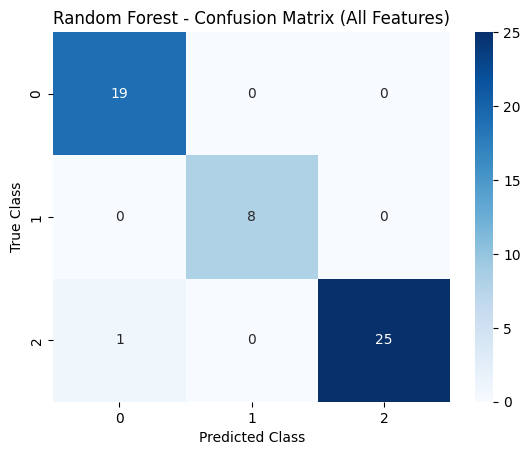

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.title("Random Forest - Confusion Matrix (All Features)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## ✅ Key Insights

- Random Forest can **handle multiclass diabetes prediction** effectively.  
- Using **all features** allows the model to capture more relationships but may increase complexity.  
- Confusion matrix shows **which classes are well predicted** and **which may need improvement**.  
- Performance can be further improved by **feature selection** or **hyperparameter tuning**.
